In [208]:
%reset -f

In [209]:
#!/usr/bin/env python3
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import torch
from torch import nn
from torch.utils.data import DataLoader
from torcheval.metrics import BinaryAccuracy
from torcheval.metrics.functional import binary_accuracy
torch.manual_seed(18)
torch.cuda.is_available()
from FacesDataset import FacesDataset

In [210]:
from DiscriminatorV3 import DiscriminatorV3, ConvBlock

In [211]:
from Generator import Generator

In [212]:
def train(generator, discriminator, optimizer, epochs, loss_fn, device='cuda'):
    target = torch.tensor([0.0]).to(device)
    
    generator.to(device)
    discriminator.to(device)

    generator.eval()
    discriminator.train()

    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    for epoch in (range(epochs)):
        # train the model on the training set
        optimizer.zero_grad()
        x = torch.randn(1, 32).to(device)
        generated_image_tensor = generator.forward(x)
        output = discriminator.forward(generated_image_tensor)
        loss = loss_fn(output.flatten().float(), target)
        loss.backward()
        optimizer.step()
        metric.update(output.flatten(), target)
        print(round(output.item(), 4), round(loss.item(), 4), metric.compute().item())

In [213]:
discriminator = DiscriminatorV3()
discriminator.load_state_dict(torch.load('models/FaceNetV3-Batch-8.pth'))

generator = Generator()

In [214]:
# train the discriminator on the generator's output
loss_fn = nn.BCELoss()
params = discriminator.parameters()
learning_rate = 3e-4
optimizer = torch.optim.Adam(params, lr=learning_rate)

num_epochs = 100
# train(generator=generator, discriminator=discriminator, optimizer=optimizer, loss_fn=loss_fn, epochs=num_epochs)

In [215]:
def train_generator(generator, discriminator, optimizer, epochs, loss_fn, device='cuda'):
    target = torch.tensor([1.0]).to(device) # Trying to fool the discriminator
    real_target = torch.tensor([0.0]).to(device) # The real target
    
    generator.to(device)
    discriminator.to(device)

    generator.eval()
    discriminator.train()

    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    for epoch in (range(epochs)):
        # train the model on the training set
        optimizer.zero_grad()
        x = torch.randn(1, 32).to(device)
        generated_image_tensor = generator.forward(x)
        output = discriminator.forward(generated_image_tensor)
        loss = loss_fn(output.flatten().float(), target)
        loss.backward()
        optimizer.step()
        metric.update(output.flatten(), real_target)
        print(round(output.item(), 4), round(loss.item(), 4), metric.compute().item())

In [216]:
loss_fn = nn.BCELoss()
params = generator.parameters()
learning_rate = 3e-4
optimizer = torch.optim.Adam(params, lr=learning_rate)

num_epochs = 1000
# train_generator(generator=generator, discriminator=discriminator, optimizer=optimizer, loss_fn=loss_fn, epochs=num_epochs)

In [217]:
# train the discriminator on the generator's output
loss_fn = nn.BCELoss()
params = discriminator.parameters()
learning_rate = 3e-4
optimizer = torch.optim.Adam(params, lr=learning_rate)

num_epochs = 100
# train(generator=generator, discriminator=discriminator, optimizer=optimizer, loss_fn=loss_fn, epochs=num_epochs)

In [218]:
loss_fn = nn.BCELoss()
params = generator.parameters()
learning_rate = 3e-4
optimizer = torch.optim.Adam(params, lr=learning_rate)

num_epochs = 1000
# train_generator(generator=generator, discriminator=discriminator, optimizer=optimizer, loss_fn=loss_fn, epochs=num_epochs)

In [362]:
discriminator = DiscriminatorV3()
discriminator.load_state_dict(torch.load('models/FaceNetV3-Batch-8.pth'))

generator = Generator()

device = 'cuda'

for _ in tqdm(range(10)):
    # # train the discriminator on the generator's output
    # loss_fn = nn.BCELoss()
    # params = discriminator.parameters()
    # learning_rate = 3e-4
    # optimizer = torch.optim.Adam(params, lr=learning_rate)

    # target = torch.tensor([0.0]).to(device)

    # generator.to(device)
    # discriminator.to(device)

    # generator.eval()
    # discriminator.train()

    # loss_fn.to(device)
    # metric = BinaryAccuracy()
    # metric.to(device)
    # for epoch in (range(100)):
    #     # train the model on the training set
    #     optimizer.zero_grad()
    #     x = torch.randn(1, 32).to(device)
    #     generated_image_tensor = generator.forward(x)
    #     output = discriminator.forward(generated_image_tensor)
    #     loss = loss_fn(output.flatten().float(), target)
    #     loss.backward()
    #     optimizer.step()
    #     metric.update(output.flatten(), target)
    #     # print(round(output.item(), 4), round(loss.item(), 4), metric.compute().item())

    # train the generator
    loss_fn = nn.BCELoss()
    params = generator.parameters()
    learning_rate = 3e-4
    optimizer = torch.optim.Adam(params, lr=learning_rate)

    target = torch.tensor([1.0]).to(device) # Trying to fool the discriminator
    real_target = torch.tensor([0.0]).to(device) # The real target

    generator.to(device)
    discriminator.to(device)

    generator.train()
    discriminator.eval()

    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    for epoch in (range(1000)):
        # train the model on the training set
        optimizer.zero_grad()
        x = torch.randn(1, 32).to(device)
        generated_image_tensor = generator.forward(x)
        output = discriminator.forward(generated_image_tensor)
        loss = loss_fn(output.flatten().float(), target)
        loss.backward()
        optimizer.step()
        metric.update(output.flatten(), real_target)
        # print(round(output.item(), 4), round(loss.item(), 4), metric.compute().item())

100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


1.0


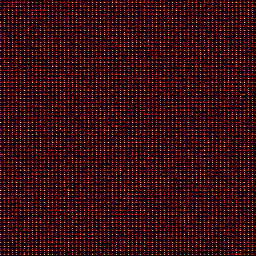

In [363]:
from torchvision import transforms

device = 'cuda'
x = torch.randn(1, 32).to(device)
generated_image_tensor = generator.forward(x)
print(round(discriminator.forward(generated_image_tensor).item(), 4))
transforms.ToPILImage()(generated_image_tensor.squeeze(0))

In [364]:
@torch.no_grad()
def estimate_performance(model, data_loader, device='cuda'):
    loss_value = 0.0
    acc_value = 0.0
    loss_fn = nn.BCELoss()
    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    model.eval()
    for batch in tqdm(data_loader):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten().float(), targets.float())
        metric.update(outputs.flatten(), targets)
        loss_value += loss.item()
        acc_value += metric.compute().item()
    return loss_value/data_loader.__len__(), acc_value/data_loader.__len__()

In [365]:
batch_size = 8
training_set = FacesDataset('datasets/train.csv')
train_loader = DataLoader(dataset=training_set, batch_size=batch_size, shuffle=True)

valid_set = FacesDataset('datasets/valid.csv')
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size, shuffle=True)

test_set = FacesDataset('datasets/test.csv')
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [366]:
estimate_performance(model=discriminator, data_loader=train_loader)

100%|██████████| 12500/12500 [02:02<00:00, 102.04it/s]


(0.07374721482980123, 0.972492988114357)

In [367]:
estimate_performance(model=discriminator, data_loader=valid_loader)

100%|██████████| 2500/2500 [00:25<00:00, 99.11it/s] 


(0.15557737468055494, 0.9436747346401214)

In [368]:
estimate_performance(model=discriminator, data_loader=test_loader)

100%|██████████| 2500/2500 [00:24<00:00, 103.14it/s]


(0.1570956337167765, 0.9473577121973038)